## Data description
- Below is the description of each feature available in the dataset.
<img src="../images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**Design a predictive model to determine the potential customers.** The target variable is `Potential_Customer`. 

**Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

# Table of Content

- [JDS Capstone](#JDS-Capstone)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#-<font-color=green-0.-Import-necessary-Packages<font>)
- [1. Load the Data into Pandas Dataframe](#<font-color=green-1.-Load-the-Data-into-Pandas-Dataframe<font>)
- [2. Data Cleaning](#<font-color=green2.-Data-Cleaning<font>)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#<font-color=green3.-Exploratory-Data-Analysis-(EDA)<font>)
    - [3.1 Explore Categorical Variables](#3.1-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
        - [3.3.2 Check the Data for Missing Values](#3.3.2-Check-the-Data-for-Missing-Values)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#<font-color=green4.-Feature-Enginearing<font)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#<font-color=green5.-Feature-Selection<font)
- [6. Data PreProcessing](#<font-color=green6.-Data-PreProcessing<font)
    - [6.1 Separate X (features) and y (target)](#6.1-Separate-X-(features)-and-y-(target))
    - [6.2 Dummy Variables](#6.2-Dummy-Variables)
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Feature Scaling](#6.4-Feature-Scaling)
    - [6.5 PCA on Numerical Columns only](#6.5-PCA-on-Numerical-Columns-only)
- [7. Machine Learning](#<font-color=green7.-Machine-Learning<font)

#  <font color=green> 0. Import necessary Packages<font>

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics.scorer import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

E:\Python\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
E:\Python\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
E:\Python\lib\site-packages

# <font color=green> 1. Load the Data into Pandas Dataframe<font>

## Using google colab

In [2]:
# Load the data into data dataframe
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## Using Jupyter Notebook

In [2]:
data = pd.read_csv('data.csv')

In [3]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [4]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# <font color=green>2. Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [6]:
4469 * 25

111725

## 2.2 What is the type of each column?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [8]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [9]:
data.Cust_Last_Purchase = data.Cust_Last_Purchase.str.replace('$','')
data.Pur_latest = data.Pur_latest.str.replace('$','')
data.Pur_3_years_Avg = data.Pur_3_years_Avg.str.replace('$','')
data.Pur_5_years_Avg = data.Pur_5_years_Avg.str.replace('$','')
data.Pur_3_years_Avg_Indirect = data.Pur_3_years_Avg_Indirect.str.replace('$','')
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace('$','')

In [10]:
CatCols = ['Potential_Customer', 'Status_Cust', 'Status_Latest_Ad', 'Cust_Prop', 'Gender']
NumCols = list(set(data.columns)-set(CatCols))

In [11]:
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Cust_Prop',
 'Gender']

In [12]:
NumCols

['Cust_Last_Purchase',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_5_Year',
 'C_ID',
 'Ad_Res_3_Year',
 'Ad_Res_Ind_1_Year',
 'InAct_First',
 'Pur_3_years_Avg',
 'Pur_5_years',
 'Pur_3_years',
 'InAct_Last',
 'Pur_3_years_Indirect',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg_Indirect',
 'Ad_Res_1_year',
 'Pur_latest',
 'Cust_Ann_Income',
 'Pur_5_years_Avg',
 'Age']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [14]:
data.Cust_Ann_Income = data.Cust_Ann_Income.str.replace(',','')

In [15]:
data.head(2).T

,0,1
Potential_Customer,1,1
C_ID,9946,87939
Cust_Last_Purchase,5.00,30.00
Pur_3_years,2,1
Pur_5_years,17,7
Pur_3_years_Indirect,2,0
Pur_5_years_Indirect,4,3
Pur_latest,0.00,25.00
Pur_3_years_Avg,7.50,25.00
Pur_5_years_Avg,7.76,13.00


In [16]:
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   float64 
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [18]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4464     True
4465     True
4466     True
4467     True
4468     True
Length: 4469, dtype: bool

In [19]:
data.duplicated().sum()

851

In [20]:
data=data.drop_duplicates()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   C_ID                      3618 non-null   float64 
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [22]:
data = data.drop(['C_ID'], axis=1)

In [23]:
data.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,...,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,...,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,...,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,...,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,...,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


# <font color=green>3. Exploratory Data Analysis (EDA)<font>
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [24]:
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Cust_Prop',
 'Gender']

In [25]:
data.cat = data[CatCols]

In [26]:
data.cat

,Potential_Customer,Status_Cust,Status_Latest_Ad,Cust_Prop,Gender
0,1,A,0,H,F
1,1,A,1,U,M
2,0,S,1,U,F
3,1,A,0,U,F
4,1,S,1,H,F
...,...,...,...,...,...
3613,1,A,0,H,F
3614,0,S,1,H,F
3615,0,A,1,U,M
3616,0,A,1,H,M


In [27]:
data.nunique()

Potential_Customer             2
Cust_Last_Purchase            50
Pur_3_years                   15
Pur_5_years                   63
Pur_3_years_Indirect          10
Pur_5_years_Indirect          31
Pur_latest                    59
Pur_3_years_Avg              413
Pur_5_years_Avg             1057
Pur_3_years_Avg_Indirect     263
InAct_Last                    24
InAct_First                  121
Ad_Res_1_year                 42
Ad_Res_3_Year                 60
Ad_Res_5_Year                131
Ad_Res_Ind_1_Year             15
Ad_Res_Ind_3_Year             25
Ad_Res_Ind_5_Year             47
Status_Cust                    6
Status_Latest_Ad               2
Age                           74
Gender                         3
Cust_Prop                      2
Cust_Ann_Income             1897
dtype: int64

### 3.1.1 Insight

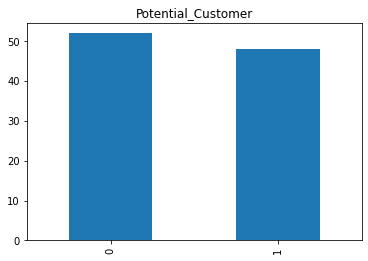

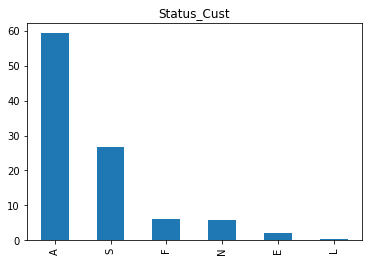

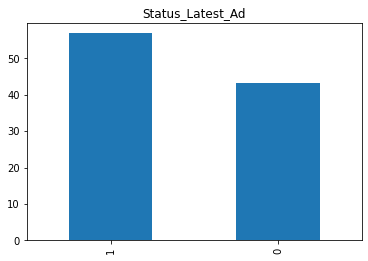

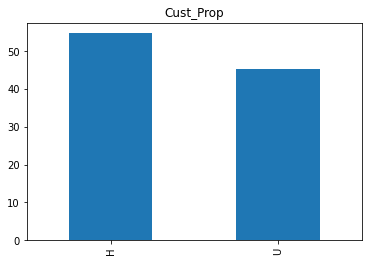

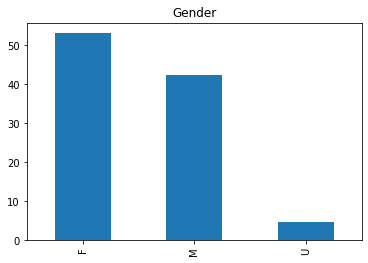

In [28]:
(data.Potential_Customer.value_counts(normalize=True)*100).plot.bar(title = "Potential_Customer")
plt.show()
(data.Status_Cust.value_counts(normalize=True)*100).plot.bar(title = "Status_Cust")
plt.show()
(data.Status_Latest_Ad.value_counts(normalize=True)*100).plot.bar(title = "Status_Latest_Ad")
plt.show()
(data.Cust_Prop.value_counts(normalize=True)*100).plot.bar(title = "Cust_Prop")
plt.show()
(data.Gender.value_counts(normalize=True)*100).plot.bar(title = "Gender")
plt.show()

A = Active buyer \
S = Star buyer \
F = First time buyer \
N = New buyer \
E = Inactive buyer \
L = Lapsing buyer

### 3.1.2 Solution

## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [29]:
Catfes = list(set(CatCols)-set(['Potential_Customer']))

In [30]:
Catfes

['Gender', 'Status_Cust', 'Status_Latest_Ad', 'Cust_Prop']

### 3.2.1. Insight

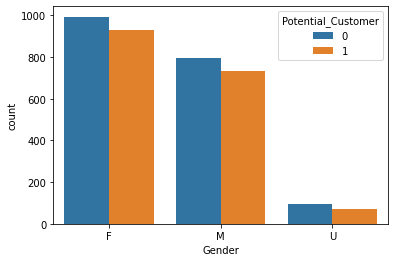

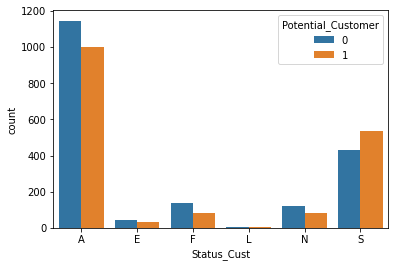

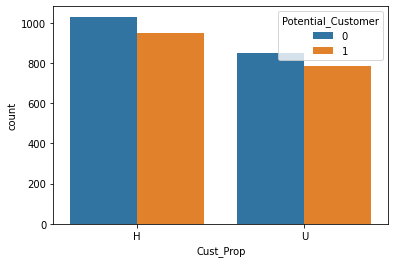

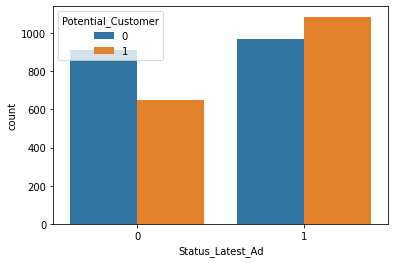

In [31]:
sns.countplot(x=data.Gender, hue=data.Potential_Customer, data=data)
plt.show()
sns.countplot(x=data.Status_Cust, hue=data.Potential_Customer, data=data)
plt.show()
sns.countplot(x=data.Cust_Prop, hue=data.Potential_Customer, data=data)
plt.show()
sns.countplot(x=data.Status_Latest_Ad, hue=data.Potential_Customer, data=data)
plt.show()

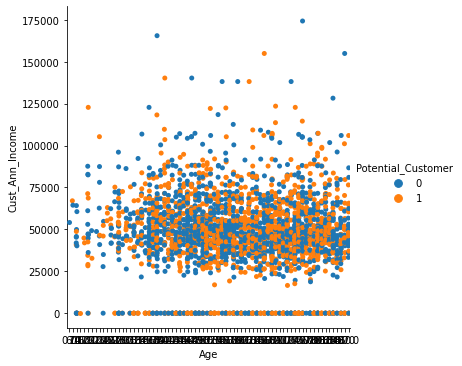

In [32]:
sns.catplot(x='Age', y='Cust_Ann_Income', hue='Potential_Customer', data=data)
yticks=[0,10000,200]
xticks=[0,80,10]
plt.show()

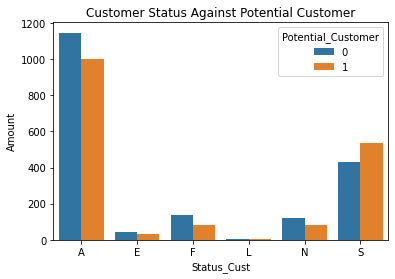

In [33]:
myfig = sns.countplot(x=data.Status_Cust, hue=data.Potential_Customer, data=data).set_title(
                    'Customer Status Against Potential Customer')
plt.ylabel('Amount')
plt.show()

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [34]:
NumCols

['Cust_Last_Purchase',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_5_Year',
 'C_ID',
 'Ad_Res_3_Year',
 'Ad_Res_Ind_1_Year',
 'InAct_First',
 'Pur_3_years_Avg',
 'Pur_5_years',
 'Pur_3_years',
 'InAct_Last',
 'Pur_3_years_Indirect',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg_Indirect',
 'Ad_Res_1_year',
 'Pur_latest',
 'Cust_Ann_Income',
 'Pur_5_years_Avg',
 'Age']

### 3.3.1 Insight

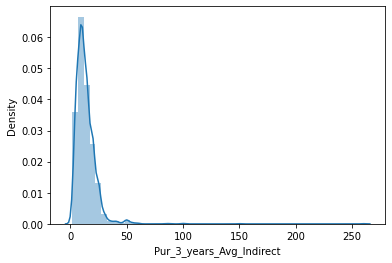

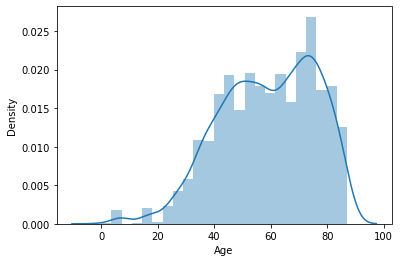

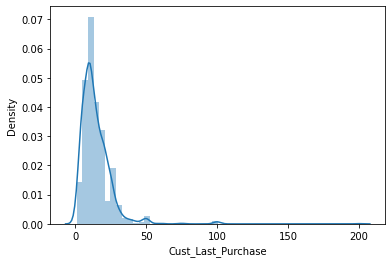

In [35]:
sns.distplot(data['Pur_3_years_Avg_Indirect']);
plt.show()
sns.distplot(data['Age']);
plt.show()
sns.distplot(data['Cust_Last_Purchase']);
plt.show()

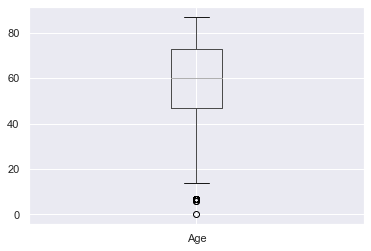

In [36]:
sns.set(style="dark")
data.boxplot(column='Age');

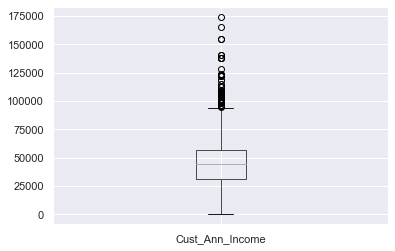

In [37]:
data.boxplot(column='Cust_Ann_Income');

## 3.3.2 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [39]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_Last_Purchase,1736.0,14.557748,11.566174,1.00,8.00,11.000,20.0000,200.0
Pur_3_years,3618.0,3.308734,2.185492,0.00,2.00,3.000,4.0000,15.0
Pur_5_years,3618.0,11.018795,9.405537,1.00,4.00,9.000,15.0000,91.0
Pur_3_years_Indirect,3618.0,1.909066,1.624995,0.00,1.00,2.000,3.0000,9.0
Pur_5_years_Indirect,3618.0,5.887507,4.904147,0.00,2.00,5.000,9.0000,41.0
Pur_latest,3618.0,15.267344,10.794970,0.00,10.00,15.000,20.0000,250.0
Pur_3_years_Avg,3618.0,14.309536,10.060256,0.00,9.00,13.000,17.5000,260.0
Pur_5_years_Avg,3618.0,11.913532,8.046675,1.50,7.50,10.295,14.7875,200.0
Pur_3_years_Avg_Indirect,2956.0,13.582128,9.729153,1.75,8.00,11.670,16.6700,260.0
InAct_Last,3618.0,17.934218,4.145219,4.00,16.00,18.000,20.0000,27.0


In [41]:
data['Cust_Last_Purchase'].fillna(data['Cust_Last_Purchase'].mean(),inplace=True)

data['Pur_3_years_Avg_Indirect'].fillna(data['Pur_3_years_Avg_Indirect'].mean(),inplace=True)

data['Age'].fillna(data['Age'].median(),inplace=True)

In [42]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Potential_Customer,1,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
Cust_Last_Purchase,5.0,30.0,14.557748,20.0,5.0,10.0,14.557748,14.557748,13.0,14.557748,14.557748,14.557748,14.557748,10.0,14.557748,14.557748,20.0,14.557748,25.0,14.557748
Pur_3_years,2.0,1.0,5.0,1.0,3.0,4.0,3.0,1.0,4.0,4.0,3.0,8.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,4.0
Pur_5_years,17.0,7.0,12.0,11.0,15.0,15.0,12.0,3.0,16.0,14.0,5.0,11.0,27.0,18.0,18.0,19.0,4.0,3.0,1.0,5.0
Pur_3_years_Indirect,2.0,0.0,3.0,0.0,2.0,4.0,3.0,1.0,3.0,4.0,0.0,4.0,3.0,1.0,4.0,1.0,0.0,0.0,1.0,3.0
Pur_5_years_Indirect,4.0,3.0,5.0,3.0,7.0,12.0,8.0,3.0,9.0,14.0,1.0,5.0,13.0,8.0,10.0,16.0,2.0,0.0,1.0,3.0
Pur_latest,0.0,25.0,15.0,20.0,3.0,10.0,18.0,20.0,5.0,16.0,15.0,12.0,5.0,10.0,25.0,10.0,15.0,10.0,15.0,25.0
Pur_3_years_Avg,7.5,25.0,15.0,20.0,4.33,7.75,18.0,20.0,7.75,14.5,12.67,10.5,4.5,10.0,26.25,10.0,15.0,13.33,15.0,21.25
Pur_5_years_Avg,7.76,13.0,11.25,12.45,3.8,7.0,14.58,18.33,8.06,11.57,10.6,9.45,3.78,8.39,21.61,8.32,16.25,13.33,15.0,22.0
Pur_3_years_Avg_Indirect,7.5,13.582128,14.67,13.582128,4.0,7.75,18.0,20.0,7.0,14.5,13.582128,10.5,4.33,10.0,26.25,10.0,13.582128,13.582128,15.0,20.0


## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

In [43]:
NumCols

['Cust_Last_Purchase',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_5_Year',
 'C_ID',
 'Ad_Res_3_Year',
 'Ad_Res_Ind_1_Year',
 'InAct_First',
 'Pur_3_years_Avg',
 'Pur_5_years',
 'Pur_3_years',
 'InAct_Last',
 'Pur_3_years_Indirect',
 'Ad_Res_Ind_3_Year',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg_Indirect',
 'Ad_Res_1_year',
 'Pur_latest',
 'Cust_Ann_Income',
 'Pur_5_years_Avg',
 'Age']

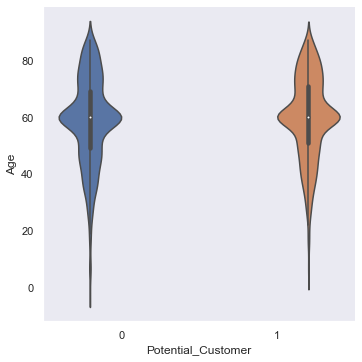

In [44]:
sns.catplot(x='Potential_Customer', y='Age', hue='Potential_Customer', data=data, kind='violin')

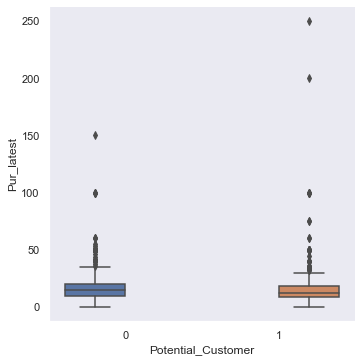

In [45]:
sns.catplot(x='Potential_Customer', y='Pur_latest', hue='Potential_Customer', data=data, kind='box')

## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

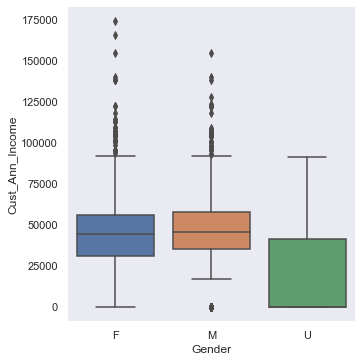

In [46]:
sns.catplot(x='Gender',y='Cust_Ann_Income',data=data, kind='box')

There are no significant difference between men/women's salary

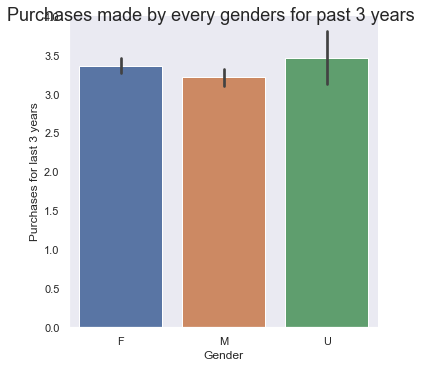

In [48]:
myFigure = sns.catplot(x='Gender',y='Pur_3_years',data=data, kind='bar')
plt.ylabel('Purchases for last 3 years')
myFigure.fig.suptitle('Purchases made by every genders for past 3 years', fontsize = 18)
plt.show()

There are no significant difference between men/women's purchases for past 3 years

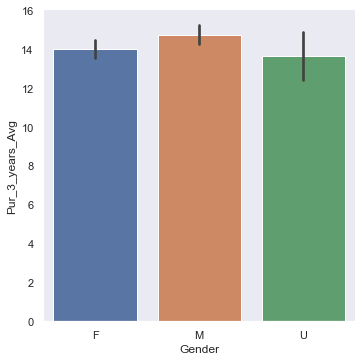

In [49]:
sns.catplot(x='Gender',y='Pur_3_years_Avg',data=data, kind='bar')

There are no significant difference between men/women's average purchases for past 3 years

In [50]:
data['Total_pur_3_yrs'] = data.apply(lambda row: row.Pur_3_years + 
                                  (row.Pur_3_years_Indirect), axis = 1)

In [51]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
Cust_Last_Purchase,5.0,30.0,14.557748,20.0,5.0
Pur_3_years,2.0,1.0,5.0,1.0,3.0
Pur_5_years,17.0,7.0,12.0,11.0,15.0
Pur_3_years_Indirect,2.0,0.0,3.0,0.0,2.0
Pur_5_years_Indirect,4.0,3.0,5.0,3.0,7.0
Pur_latest,0.0,25.0,15.0,20.0,3.0
Pur_3_years_Avg,7.5,25.0,15.0,20.0,4.33
Pur_5_years_Avg,7.76,13.0,11.25,12.45,3.8
Pur_3_years_Avg_Indirect,7.5,13.582128,14.67,13.582128,4.0


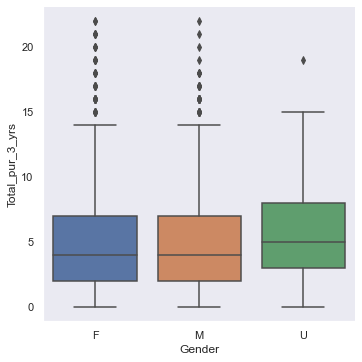

In [52]:
sns.catplot(x='Gender',y='Total_pur_3_yrs',data=data, kind='box')

There are no significant difference between men/women's total purchases for past 3 years

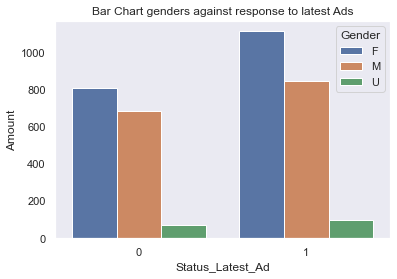

In [53]:
myFigure1 = sns.countplot(x=data.Status_Latest_Ad, hue=data.Gender, data=data).set_title(
                    'Bar Chart genders against response to latest Ads')
plt.ylabel('Amount')
plt.show()


Female has the highest rate of response to the latest promotion ads

# <font color=green>4. Feature Enginearing<font>

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

Add new column : 'Total_pur_5_yrs'

In [54]:
data['Total_pur_5_yrs'] = data.apply(lambda row: row.Pur_5_years + 
                                  (row.Pur_5_years_Indirect), axis = 1)

In [55]:
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
Cust_Last_Purchase,5.0,30.0,14.557748,20.0,5.0
Pur_3_years,2.0,1.0,5.0,1.0,3.0
Pur_5_years,17.0,7.0,12.0,11.0,15.0
Pur_3_years_Indirect,2.0,0.0,3.0,0.0,2.0
Pur_5_years_Indirect,4.0,3.0,5.0,3.0,7.0
Pur_latest,0.0,25.0,15.0,20.0,3.0
Pur_3_years_Avg,7.5,25.0,15.0,20.0,4.33
Pur_5_years_Avg,7.76,13.0,11.25,12.45,3.8
Pur_3_years_Avg_Indirect,7.5,13.582128,14.67,13.582128,4.0


## 4.2 Check Correlation between Numerical Variables

In [56]:
data.corr()

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income,Total_pur_3_yrs,Total_pur_5_yrs
Cust_Last_Purchase,1.000000,-0.235103,-0.150853,-0.200858,-0.166520,0.577042,0.462290,0.411123,0.399367,0.077825,...,0.052915,0.005371,-0.053671,-0.001048,-0.092771,-0.077317,-0.045845,0.042602,-0.229536,-0.159672
Pur_3_years,-0.235103,1.000000,0.557350,0.842210,0.540581,-0.349252,-0.355583,-0.369803,-0.342964,-0.237964,...,0.197819,0.384991,0.301513,0.344823,0.593459,0.330041,0.057117,-0.074388,0.970935,0.563784
Pur_5_years,-0.150853,0.557350,1.000000,0.478441,0.905120,-0.260562,-0.248276,-0.339597,-0.227943,-0.241410,...,0.321440,0.466951,0.790215,0.240929,0.427481,0.756462,0.161632,-0.043361,0.545161,0.988848
Pur_3_years_Indirect,-0.200858,0.842210,0.478441,1.000000,0.566286,-0.296213,-0.293545,-0.292267,-0.249369,-0.168513,...,0.165172,0.275014,0.231537,0.274756,0.639989,0.252604,0.041000,-0.044092,0.946774,0.519777
Pur_5_years_Indirect,-0.166520,0.540581,0.905120,0.566286,1.000000,-0.266606,-0.257339,-0.361608,-0.227030,-0.157472,...,0.181457,0.368464,0.750877,0.179324,0.457074,0.779955,0.155550,-0.041983,0.574147,0.958343
Pur_latest,0.577042,-0.349252,-0.260562,-0.296213,-0.266606,1.000000,0.786184,0.747429,0.652879,0.132908,...,0.033439,-0.022255,-0.106823,0.001693,-0.133058,-0.121806,-0.051166,0.071228,-0.340020,-0.268433
Pur_3_years_Avg,0.462290,-0.355583,-0.248276,-0.293545,-0.257339,0.786184,1.000000,0.881783,0.838133,0.091458,...,0.085542,0.032629,-0.072774,0.019759,-0.115329,-0.096414,-0.049210,0.055722,-0.342615,-0.256933
Pur_5_years_Avg,0.411123,-0.369803,-0.339597,-0.292267,-0.361608,0.747429,0.881783,1.000000,0.724246,0.082255,...,0.080269,-0.090136,-0.215725,-0.018264,-0.179683,-0.261724,-0.080779,0.062140,-0.350538,-0.354806
Pur_3_years_Avg_Indirect,0.399367,-0.342964,-0.227943,-0.249369,-0.227030,0.652879,0.838133,0.724246,1.000000,0.076473,...,0.088048,0.010429,-0.064515,0.009516,-0.035776,-0.091428,-0.036374,0.054122,-0.315470,-0.232657
InAct_Last,0.077825,-0.237964,-0.241410,-0.168513,-0.157472,0.132908,0.091458,0.082255,0.076473,1.000000,...,-0.564820,-0.350155,-0.239222,-0.356574,-0.175138,-0.138193,-0.088064,0.032755,-0.216885,-0.217339


# <font color=green>5. Feature Selection<font>

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# <font color=green>6. Data PreProcessing<font>

## 6.1 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [57]:
data1 = data.drop(['Cust_Last_Purchase'], axis=1)

In [58]:
data1

,Potential_Customer,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_pur_3_yrs,Total_pur_5_yrs
0,1,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.500000,14.0,...,12.0,16.0,A,0,71.0,F,H,65957.0,4.0,21.0
1,1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,13.582128,18.0,...,6.0,22.0,A,1,7.0,M,U,0.0,1.0,10.0
2,0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.670000,19.0,...,17.0,22.0,S,1,79.0,F,U,0.0,8.0,17.0
3,1,1.0,11.0,0.0,3.0,20.0,20.00,12.45,13.582128,5.0,...,8.0,33.0,A,0,73.0,F,U,76293.0,1.0,14.0
4,1,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.000000,17.0,...,12.0,24.0,S,1,68.0,F,H,113663.0,5.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,1,2.0,6.0,0.0,1.0,20.0,16.50,13.33,13.582128,19.0,...,6.0,17.0,A,0,33.0,F,H,83754.0,2.0,7.0
3614,0,7.0,31.0,4.0,21.0,13.0,12.71,10.94,13.250000,17.0,...,17.0,35.0,S,1,81.0,F,H,83754.0,11.0,52.0
3615,0,7.0,13.0,6.0,8.0,3.0,12.43,10.62,12.500000,4.0,...,18.0,24.0,A,1,39.0,M,U,0.0,13.0,21.0
3616,0,1.0,11.0,1.0,7.0,20.0,20.00,16.55,20.000000,24.0,...,15.0,25.0,A,1,76.0,M,H,71618.0,2.0,18.0


In [59]:
dataset = data1.iloc[:,1:]
target = data1['Potential_Customer']

In [60]:
dataset

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_pur_3_yrs,Total_pur_5_yrs
0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.500000,14.0,110.0,...,12.0,16.0,A,0,71.0,F,H,65957.0,4.0,21.0
1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,13.582128,18.0,75.0,...,6.0,22.0,A,1,7.0,M,U,0.0,1.0,10.0
2,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.670000,19.0,57.0,...,17.0,22.0,S,1,79.0,F,U,0.0,8.0,17.0
3,1.0,11.0,0.0,3.0,20.0,20.00,12.45,13.582128,5.0,113.0,...,8.0,33.0,A,0,73.0,F,U,76293.0,1.0,14.0
4,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.000000,17.0,118.0,...,12.0,24.0,S,1,68.0,F,H,113663.0,5.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,2.0,6.0,0.0,1.0,20.0,16.50,13.33,13.582128,19.0,57.0,...,6.0,17.0,A,0,33.0,F,H,83754.0,2.0,7.0
3614,7.0,31.0,4.0,21.0,13.0,12.71,10.94,13.250000,17.0,128.0,...,17.0,35.0,S,1,81.0,F,H,83754.0,11.0,52.0
3615,7.0,13.0,6.0,8.0,3.0,12.43,10.62,12.500000,4.0,80.0,...,18.0,24.0,A,1,39.0,M,U,0.0,13.0,21.0
3616,1.0,11.0,1.0,7.0,20.0,20.00,16.55,20.000000,24.0,93.0,...,15.0,25.0,A,1,76.0,M,H,71618.0,2.0,18.0


## 6.2 Dummy Variables
Change categorical variables with numerical variabels

In [61]:
data.head()

,Potential_Customer,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,...,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Total_pur_3_yrs,Total_pur_5_yrs
0,1,5.000000,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.500000,...,12.0,16.0,A,0,71.0,F,H,65957.0,4.0,21.0
1,1,30.000000,1.0,7.0,0.0,3.0,25.0,25.00,13.00,13.582128,...,6.0,22.0,A,1,7.0,M,U,0.0,1.0,10.0
2,0,14.557748,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.670000,...,17.0,22.0,S,1,79.0,F,U,0.0,8.0,17.0
3,1,20.000000,1.0,11.0,0.0,3.0,20.0,20.00,12.45,13.582128,...,8.0,33.0,A,0,73.0,F,U,76293.0,1.0,14.0
4,1,5.000000,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.000000,...,12.0,24.0,S,1,68.0,F,H,113663.0,5.0,22.0


In [62]:
area_dummies = pd.get_dummies(data1, columns=['Gender','Status_Cust','Cust_Prop','Status_Latest_Ad']).iloc[:, 1:]
area_dummies

,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,...,Status_Cust_A,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Cust_Prop_H,Cust_Prop_U,Status_Latest_Ad_0,Status_Latest_Ad_1
0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.500000,14.0,110.0,...,1,0,0,0,0,0,1,0,1,0
1,1.0,7.0,0.0,3.0,25.0,25.00,13.00,13.582128,18.0,75.0,...,1,0,0,0,0,0,0,1,0,1
2,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.670000,19.0,57.0,...,0,0,0,0,0,1,0,1,0,1
3,1.0,11.0,0.0,3.0,20.0,20.00,12.45,13.582128,5.0,113.0,...,1,0,0,0,0,0,0,1,1,0
4,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.000000,17.0,118.0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,2.0,6.0,0.0,1.0,20.0,16.50,13.33,13.582128,19.0,57.0,...,1,0,0,0,0,0,1,0,1,0
3614,7.0,31.0,4.0,21.0,13.0,12.71,10.94,13.250000,17.0,128.0,...,0,0,0,0,0,1,1,0,0,1
3615,7.0,13.0,6.0,8.0,3.0,12.43,10.62,12.500000,4.0,80.0,...,1,0,0,0,0,0,0,1,0,1
3616,1.0,11.0,1.0,7.0,20.0,20.00,16.55,20.000000,24.0,93.0,...,1,0,0,0,0,0,1,0,0,1


In [63]:
X = area_dummies
y = target

## 6.3 Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [64]:
NewNumCols = [
 'Pur_5_years_Avg',
 'InAct_Last',
 'InAct_First',
 'Ad_Res_1_year',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years_Avg',
 'Cust_Ann_Income',
 'Ad_Res_Ind_3_Year',
 'Pur_latest',
 'Pur_3_years_Avg_Indirect',
 'Age',
 'Ad_Res_3_Year',
 'Ad_Res_5_Year',
 'Ad_Res_Ind_5_Year',
 'Total_pur_3_yrs',
 'Total_pur_5_yrs']

In [65]:
X_num = data1[NewNumCols]
X_num

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,7.76,14.0,110.0,32.0,3.0,7.50,65957.0,12.0,0.0,7.500000,71.0,48.0,73.0,16.0,4.0,21.0
1,13.00,18.0,75.0,13.0,6.0,25.00,0.0,6.0,25.0,13.582128,7.0,35.0,55.0,22.0,1.0,10.0
2,11.25,19.0,57.0,14.0,6.0,15.00,0.0,17.0,15.0,14.670000,79.0,35.0,53.0,22.0,8.0,17.0
3,12.45,5.0,113.0,17.0,8.0,20.00,76293.0,8.0,20.0,13.582128,73.0,38.0,71.0,33.0,1.0,14.0
4,3.80,17.0,118.0,13.0,6.0,4.33,113663.0,12.0,3.0,4.000000,68.0,28.0,63.0,24.0,5.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,13.33,19.0,57.0,13.0,6.0,16.50,83754.0,6.0,20.0,13.582128,33.0,34.0,47.0,17.0,2.0,7.0
3614,10.94,17.0,128.0,13.0,6.0,12.71,83754.0,17.0,13.0,13.250000,81.0,32.0,88.0,35.0,11.0,52.0
3615,10.62,4.0,80.0,16.0,7.0,12.43,0.0,18.0,3.0,12.500000,39.0,36.0,57.0,24.0,13.0,21.0
3616,16.55,24.0,93.0,11.0,6.0,20.00,71618.0,15.0,20.0,20.000000,76.0,31.0,61.0,25.0,2.0,18.0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(
     X_num, y, test_size=0.25, random_state = 42)

## 6.4 Feature Scaling

In [67]:
scaler_std = StandardScaler().fit(X_train)
scaled_std = scaler_std.transform(X_train)

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
scaler_Mm = MinMaxScaler().fit(X_train)
scaled_Mm = scaler_Mm.transform(X_train)

In [69]:
scaler_PT = PowerTransformer().fit(X_train)
scaled_PT = scaler_PT.transform(X_train)

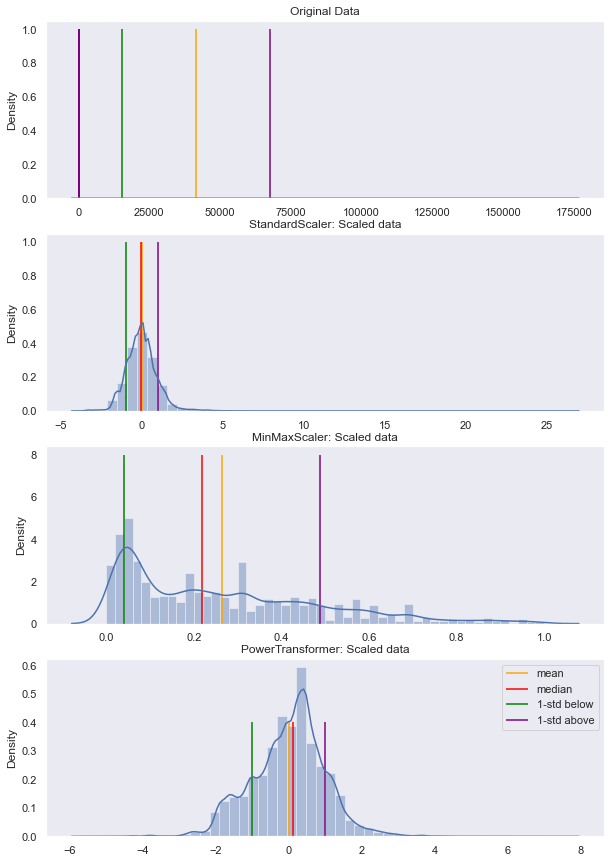

In [70]:
fig, ax=plt.subplots(4,1)
fig.set_size_inches(10, 15)

sns.distplot(area_dummies, ax=ax[0])
ax[0].vlines(np.mean(area_dummies), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(area_dummies), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(area_dummies) - np.std(area_dummies, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(area_dummies) + np.std(area_dummies, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("Original Data")


sns.distplot(scaled_std, ax=ax[1])
ax[1].set_title("StandardScaler: Scaled data")
ax[1].vlines(np.mean(scaled_std), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_std), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_std) - np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[1].vlines(np.mean(scaled_std) + np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_Mm, ax=ax[2])
ax[2].set_title("MinMaxScaler: Scaled data")
ax[2].vlines(np.mean(scaled_Mm), ymin = 0, ymax = 8, 
                               color = 'orange', label = 'mean')
ax[2].vlines(np.median(scaled_Mm), ymin = 0, ymax = 8, 
                            color = 'red', label = 'median')
ax[2].vlines(np.mean(scaled_Mm) - np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'green', label = '1-std below')
ax[2].vlines(np.mean(scaled_Mm) + np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_PT, ax=ax[3])
ax[3].set_title("PowerTransformer: Scaled data")
ax[3].vlines(np.mean(scaled_PT), ymin = 0, ymax = .4, 
                               color = 'orange', label = 'mean')
ax[3].vlines(np.median(scaled_PT), ymin = 0, ymax = .4, 
                            color = 'red', label = 'median')
ax[3].vlines(np.mean(scaled_PT) - np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'green', label = '1-std below')
ax[3].vlines(np.mean(scaled_PT) + np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

## 6.5 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [71]:
X_train_sc=pd.DataFrame(scaler_std.transform(X_train), columns=X_train.columns)
type(X_train_sc)
X_train_sc

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.346985,0.023485,-0.775405,-0.219849,0.424929,-0.481145,-0.188930,1.069251,-0.471967,-0.441056,0.784447,0.554589,-0.508220,-0.293424,0.203099,-0.348148
1,-0.060948,0.023485,0.459192,-0.021429,-0.307959,-0.822520,-1.586725,0.198966,-0.922439,-0.927509,0.851585,0.167604,0.412413,0.293987,-0.339232,0.576951
2,0.043612,-0.216044,-1.090621,-0.021429,0.424929,-0.195077,-1.586725,0.198966,-0.111589,-0.170805,-0.222622,-0.090387,-0.946617,-0.998319,0.203099,-0.775118
3,-0.038113,-0.455574,0.038903,0.176991,0.424929,0.353221,0.031903,0.851680,0.428978,0.693999,-1.095414,0.683585,0.237054,0.176505,-0.610398,-0.419310
4,0.975035,1.460662,-1.300765,-1.211950,-1.773734,0.543933,2.950449,-1.106462,0.428978,0.693999,-0.424035,-1.638331,-1.472693,-1.585730,-0.881564,-1.059764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,-0.312132,0.023485,1.483644,-0.021429,0.424929,0.734645,-0.234460,-1.324033,0.699262,0.000224,1.522963,0.683585,1.113848,1.468811,-0.881564,0.292305
2709,-0.493609,-0.216044,1.352304,-0.219849,0.424929,-0.409628,0.253540,0.634108,-0.381872,-0.387006,0.045930,0.038608,0.894649,1.233846,-0.339232,0.790436
2710,-0.607784,0.981603,-0.250045,-0.219849,0.424929,-0.568873,-1.586725,-0.018605,-0.471967,-0.927509,0.045930,-0.348378,-0.289022,-0.410907,-0.339232,-0.561633
2711,-1.022417,0.502544,-0.433921,-0.219849,0.424929,-0.992254,-0.154352,1.069251,-0.922439,-1.082092,-1.901069,0.296599,-0.201343,0.059023,2.914757,1.075082


In [72]:
dummy_train = X_train_sc.iloc[:,-11:]
dummy_train

,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.481145,-0.188930,1.069251,-0.471967,-0.441056,0.784447,0.554589,-0.508220,-0.293424,0.203099,-0.348148
1,-0.822520,-1.586725,0.198966,-0.922439,-0.927509,0.851585,0.167604,0.412413,0.293987,-0.339232,0.576951
2,-0.195077,-1.586725,0.198966,-0.111589,-0.170805,-0.222622,-0.090387,-0.946617,-0.998319,0.203099,-0.775118
3,0.353221,0.031903,0.851680,0.428978,0.693999,-1.095414,0.683585,0.237054,0.176505,-0.610398,-0.419310
4,0.543933,2.950449,-1.106462,0.428978,0.693999,-0.424035,-1.638331,-1.472693,-1.585730,-0.881564,-1.059764
...,...,...,...,...,...,...,...,...,...,...,...
2708,0.734645,-0.234460,-1.324033,0.699262,0.000224,1.522963,0.683585,1.113848,1.468811,-0.881564,0.292305
2709,-0.409628,0.253540,0.634108,-0.381872,-0.387006,0.045930,0.038608,0.894649,1.233846,-0.339232,0.790436
2710,-0.568873,-1.586725,-0.018605,-0.471967,-0.927509,0.045930,-0.348378,-0.289022,-0.410907,-0.339232,-0.561633
2711,-0.992254,-0.154352,1.069251,-0.922439,-1.082092,-1.901069,0.296599,-0.201343,0.059023,2.914757,1.075082


In [73]:
X_test_sc=pd.DataFrame(scaler_std.transform(X_test), columns=X_test.columns)
X_test_sc

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.995977,-0.455574,-0.433921,-1.211950,-1.773734,-0.968415,-1.586725,-0.671319,-1.012533,-1.035609,0.985860,-1.638331,-0.727419,-0.763354,1.830094,0.932759
1,0.133749,0.023485,0.800676,-0.021429,0.424929,0.830001,0.271002,-1.324033,1.329923,0.000224,1.120136,-0.219382,0.193215,0.176505,-0.881564,-0.632795
2,-0.161902,-0.216044,1.378572,-0.021429,0.424929,0.353221,-0.244187,0.851680,0.879451,0.045396,-1.229690,0.425594,0.806970,1.233846,-0.339232,0.434628
3,-0.375829,0.023485,1.299768,0.176991,0.424929,-0.123560,-0.239668,1.069251,-0.471967,-0.027032,-1.565379,0.812580,1.289207,1.586293,0.474265,0.576951
4,0.073658,1.939721,-0.880477,-0.616690,-1.040846,0.543933,-1.586725,-1.759175,0.428978,0.000224,0.045930,-0.219382,-0.902777,-0.998319,-1.152729,-0.988602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-0.511637,-3.329928,1.431108,1.169092,1.157817,-0.409628,-0.539882,0.634108,-0.471967,-0.387006,-0.088346,1.070571,1.771443,1.468811,-0.068066,1.786697
901,-0.357802,-0.695103,0.984552,-1.807211,-2.506621,-0.028204,-1.586725,-1.324033,-0.021494,0.009723,0.045930,-2.283307,-0.376701,-0.058460,0.745431,1.146243
902,-1.102940,0.023485,1.483644,-0.815110,-1.040846,-1.013232,0.399933,-0.888890,-1.102628,-0.927509,1.455826,-1.251345,0.280894,0.411470,-0.339232,0.861597
903,-0.997179,-0.216044,1.378572,-0.219849,0.424929,-1.029443,1.132585,1.069251,-0.922439,-1.071282,0.985860,0.167604,1.113848,1.703776,2.372426,2.000182


In [74]:
dummy_test = X_test_sc.iloc[:,-11:]
dummy_test

,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.968415,-1.586725,-0.671319,-1.012533,-1.035609,0.985860,-1.638331,-0.727419,-0.763354,1.830094,0.932759
1,0.830001,0.271002,-1.324033,1.329923,0.000224,1.120136,-0.219382,0.193215,0.176505,-0.881564,-0.632795
2,0.353221,-0.244187,0.851680,0.879451,0.045396,-1.229690,0.425594,0.806970,1.233846,-0.339232,0.434628
3,-0.123560,-0.239668,1.069251,-0.471967,-0.027032,-1.565379,0.812580,1.289207,1.586293,0.474265,0.576951
4,0.543933,-1.586725,-1.759175,0.428978,0.000224,0.045930,-0.219382,-0.902777,-0.998319,-1.152729,-0.988602
...,...,...,...,...,...,...,...,...,...,...,...
900,-0.409628,-0.539882,0.634108,-0.471967,-0.387006,-0.088346,1.070571,1.771443,1.468811,-0.068066,1.786697
901,-0.028204,-1.586725,-1.324033,-0.021494,0.009723,0.045930,-2.283307,-0.376701,-0.058460,0.745431,1.146243
902,-1.013232,0.399933,-0.888890,-1.102628,-0.927509,1.455826,-1.251345,0.280894,0.411470,-0.339232,0.861597
903,-1.029443,1.132585,1.069251,-0.922439,-1.071282,0.985860,0.167604,1.113848,1.703776,2.372426,2.000182


In [75]:
X_train_sc

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.346985,0.023485,-0.775405,-0.219849,0.424929,-0.481145,-0.188930,1.069251,-0.471967,-0.441056,0.784447,0.554589,-0.508220,-0.293424,0.203099,-0.348148
1,-0.060948,0.023485,0.459192,-0.021429,-0.307959,-0.822520,-1.586725,0.198966,-0.922439,-0.927509,0.851585,0.167604,0.412413,0.293987,-0.339232,0.576951
2,0.043612,-0.216044,-1.090621,-0.021429,0.424929,-0.195077,-1.586725,0.198966,-0.111589,-0.170805,-0.222622,-0.090387,-0.946617,-0.998319,0.203099,-0.775118
3,-0.038113,-0.455574,0.038903,0.176991,0.424929,0.353221,0.031903,0.851680,0.428978,0.693999,-1.095414,0.683585,0.237054,0.176505,-0.610398,-0.419310
4,0.975035,1.460662,-1.300765,-1.211950,-1.773734,0.543933,2.950449,-1.106462,0.428978,0.693999,-0.424035,-1.638331,-1.472693,-1.585730,-0.881564,-1.059764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,-0.312132,0.023485,1.483644,-0.021429,0.424929,0.734645,-0.234460,-1.324033,0.699262,0.000224,1.522963,0.683585,1.113848,1.468811,-0.881564,0.292305
2709,-0.493609,-0.216044,1.352304,-0.219849,0.424929,-0.409628,0.253540,0.634108,-0.381872,-0.387006,0.045930,0.038608,0.894649,1.233846,-0.339232,0.790436
2710,-0.607784,0.981603,-0.250045,-0.219849,0.424929,-0.568873,-1.586725,-0.018605,-0.471967,-0.927509,0.045930,-0.348378,-0.289022,-0.410907,-0.339232,-0.561633
2711,-1.022417,0.502544,-0.433921,-0.219849,0.424929,-0.992254,-0.154352,1.069251,-0.922439,-1.082092,-1.901069,0.296599,-0.201343,0.059023,2.914757,1.075082


In [76]:
train_PCA=X_train_sc[NewNumCols] 

In [77]:
train_PCA

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.346985,0.023485,-0.775405,-0.219849,0.424929,-0.481145,-0.188930,1.069251,-0.471967,-0.441056,0.784447,0.554589,-0.508220,-0.293424,0.203099,-0.348148
1,-0.060948,0.023485,0.459192,-0.021429,-0.307959,-0.822520,-1.586725,0.198966,-0.922439,-0.927509,0.851585,0.167604,0.412413,0.293987,-0.339232,0.576951
2,0.043612,-0.216044,-1.090621,-0.021429,0.424929,-0.195077,-1.586725,0.198966,-0.111589,-0.170805,-0.222622,-0.090387,-0.946617,-0.998319,0.203099,-0.775118
3,-0.038113,-0.455574,0.038903,0.176991,0.424929,0.353221,0.031903,0.851680,0.428978,0.693999,-1.095414,0.683585,0.237054,0.176505,-0.610398,-0.419310
4,0.975035,1.460662,-1.300765,-1.211950,-1.773734,0.543933,2.950449,-1.106462,0.428978,0.693999,-0.424035,-1.638331,-1.472693,-1.585730,-0.881564,-1.059764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,-0.312132,0.023485,1.483644,-0.021429,0.424929,0.734645,-0.234460,-1.324033,0.699262,0.000224,1.522963,0.683585,1.113848,1.468811,-0.881564,0.292305
2709,-0.493609,-0.216044,1.352304,-0.219849,0.424929,-0.409628,0.253540,0.634108,-0.381872,-0.387006,0.045930,0.038608,0.894649,1.233846,-0.339232,0.790436
2710,-0.607784,0.981603,-0.250045,-0.219849,0.424929,-0.568873,-1.586725,-0.018605,-0.471967,-0.927509,0.045930,-0.348378,-0.289022,-0.410907,-0.339232,-0.561633
2711,-1.022417,0.502544,-0.433921,-0.219849,0.424929,-0.992254,-0.154352,1.069251,-0.922439,-1.082092,-1.901069,0.296599,-0.201343,0.059023,2.914757,1.075082


In [78]:
test_PCA=X_test_sc[NewNumCols]
test_PCA

,Pur_5_years_Avg,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_Ind_1_Year,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
0,-0.995977,-0.455574,-0.433921,-1.211950,-1.773734,-0.968415,-1.586725,-0.671319,-1.012533,-1.035609,0.985860,-1.638331,-0.727419,-0.763354,1.830094,0.932759
1,0.133749,0.023485,0.800676,-0.021429,0.424929,0.830001,0.271002,-1.324033,1.329923,0.000224,1.120136,-0.219382,0.193215,0.176505,-0.881564,-0.632795
2,-0.161902,-0.216044,1.378572,-0.021429,0.424929,0.353221,-0.244187,0.851680,0.879451,0.045396,-1.229690,0.425594,0.806970,1.233846,-0.339232,0.434628
3,-0.375829,0.023485,1.299768,0.176991,0.424929,-0.123560,-0.239668,1.069251,-0.471967,-0.027032,-1.565379,0.812580,1.289207,1.586293,0.474265,0.576951
4,0.073658,1.939721,-0.880477,-0.616690,-1.040846,0.543933,-1.586725,-1.759175,0.428978,0.000224,0.045930,-0.219382,-0.902777,-0.998319,-1.152729,-0.988602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,-0.511637,-3.329928,1.431108,1.169092,1.157817,-0.409628,-0.539882,0.634108,-0.471967,-0.387006,-0.088346,1.070571,1.771443,1.468811,-0.068066,1.786697
901,-0.357802,-0.695103,0.984552,-1.807211,-2.506621,-0.028204,-1.586725,-1.324033,-0.021494,0.009723,0.045930,-2.283307,-0.376701,-0.058460,0.745431,1.146243
902,-1.102940,0.023485,1.483644,-0.815110,-1.040846,-1.013232,0.399933,-0.888890,-1.102628,-0.927509,1.455826,-1.251345,0.280894,0.411470,-0.339232,0.861597
903,-0.997179,-0.216044,1.378572,-0.219849,0.424929,-1.029443,1.132585,1.069251,-0.922439,-1.071282,0.985860,0.167604,1.113848,1.703776,2.372426,2.000182


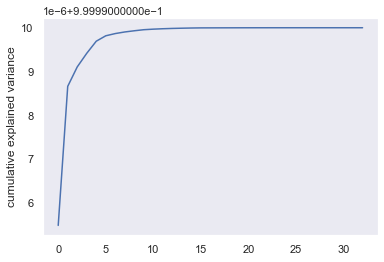

In [79]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('cumulative explained variance');

In [80]:
pca = PCA(n_components=5)
PCA_train = pd.DataFrame(pca.fit_transform(train_PCA))
PCA_test = pd.DataFrame(pca.fit_transform(test_PCA))

In [81]:
PCA_train.index = X_train.index
PCA_test.index = X_test.index

In [82]:
dummy_train.index = X_train.index
dummy_test.index = X_test.index 

In [83]:
PCA_train

,0,1,2,3,4
582,0.282897,-0.676412,-1.163125,-0.242055,0.470417
1067,1.034901,-1.193928,0.516860,0.968575,1.310719
1052,-1.029762,-0.450130,-1.658374,0.062381,1.503563
2836,0.265051,1.135904,-0.534299,-0.400790,-0.391884
56,-4.475692,-0.132404,0.654788,-1.090555,-2.334375
...,...,...,...,...,...
1130,1.200181,1.044970,2.074999,1.722089,-0.121375
1294,1.926506,-0.336874,1.110805,0.016144,-0.493435
860,-0.434771,-1.390666,-0.300689,0.128710,1.157980
3507,1.754301,-2.047643,-1.322700,-2.788771,0.470023


In [84]:
X_train_pca = pd.concat([PCA_train, dummy_train],axis=1)
X_train_pca

,0,1,2,3,4,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
582,0.282897,-0.676412,-1.163125,-0.242055,0.470417,-0.481145,-0.188930,1.069251,-0.471967,-0.441056,0.784447,0.554589,-0.508220,-0.293424,0.203099,-0.348148
1067,1.034901,-1.193928,0.516860,0.968575,1.310719,-0.822520,-1.586725,0.198966,-0.922439,-0.927509,0.851585,0.167604,0.412413,0.293987,-0.339232,0.576951
1052,-1.029762,-0.450130,-1.658374,0.062381,1.503563,-0.195077,-1.586725,0.198966,-0.111589,-0.170805,-0.222622,-0.090387,-0.946617,-0.998319,0.203099,-0.775118
2836,0.265051,1.135904,-0.534299,-0.400790,-0.391884,0.353221,0.031903,0.851680,0.428978,0.693999,-1.095414,0.683585,0.237054,0.176505,-0.610398,-0.419310
56,-4.475692,-0.132404,0.654788,-1.090555,-2.334375,0.543933,2.950449,-1.106462,0.428978,0.693999,-0.424035,-1.638331,-1.472693,-1.585730,-0.881564,-1.059764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.200181,1.044970,2.074999,1.722089,-0.121375,0.734645,-0.234460,-1.324033,0.699262,0.000224,1.522963,0.683585,1.113848,1.468811,-0.881564,0.292305
1294,1.926506,-0.336874,1.110805,0.016144,-0.493435,-0.409628,0.253540,0.634108,-0.381872,-0.387006,0.045930,0.038608,0.894649,1.233846,-0.339232,0.790436
860,-0.434771,-1.390666,-0.300689,0.128710,1.157980,-0.568873,-1.586725,-0.018605,-0.471967,-0.927509,0.045930,-0.348378,-0.289022,-0.410907,-0.339232,-0.561633
3507,1.754301,-2.047643,-1.322700,-2.788771,0.470023,-0.992254,-0.154352,1.069251,-0.922439,-1.082092,-1.901069,0.296599,-0.201343,0.059023,2.914757,1.075082


In [85]:
X_test_pca = pd.concat([PCA_test,dummy_test],axis=1)
X_test_pca

,0,1,2,3,4,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_3_Year,Pur_latest,Pur_3_years_Avg_Indirect,Age,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_5_Year,Total_pur_3_yrs,Total_pur_5_yrs
3449,-0.632460,-3.597343,0.311804,1.181688,-1.241100,-0.968415,-1.586725,-0.671319,-1.012533,-1.035609,0.985860,-1.638331,-0.727419,-0.763354,1.830094,0.932759
3386,-0.541092,1.137736,-1.189356,1.330187,0.705034,0.830001,0.271002,-1.324033,1.329923,0.000224,1.120136,-0.219382,0.193215,0.176505,-0.881564,-0.632795
1456,1.640668,0.984775,-0.971477,-0.902692,-0.519767,0.353221,-0.244187,0.851680,0.879451,0.045396,-1.229690,0.425594,0.806970,1.233846,-0.339232,0.434628
1078,2.648639,0.161673,-0.542042,-1.434730,-0.628898,-0.123560,-0.239668,1.069251,-0.471967,-0.027032,-1.565379,0.812580,1.289207,1.586293,0.474265,0.576951
3010,-2.916869,-0.293999,-1.059568,0.492668,-1.493038,0.543933,-1.586725,-1.759175,0.428978,0.000224,0.045930,-0.219382,-0.902777,-0.998319,-1.152729,-0.988602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,4.174391,0.559310,0.579898,1.608871,0.106760,-0.409628,-0.539882,0.634108,-0.471967,-0.387006,-0.088346,1.070571,1.771443,1.468811,-0.068066,1.786697
3575,-1.196634,-2.491970,-2.018284,0.967359,-1.207570,-0.028204,-1.586725,-1.324033,-0.021494,0.009723,0.045930,-2.283307,-0.376701,-0.058460,0.745431,1.146243
3373,0.601732,-2.719470,-1.604542,1.267802,1.121193,-1.013232,0.399933,-0.888890,-1.102628,-0.927509,1.455826,-1.251345,0.280894,0.411470,-0.339232,0.861597
220,3.921977,-1.844220,-0.086477,-0.546935,1.064664,-1.029443,1.132585,1.069251,-0.922439,-1.071282,0.985860,0.167604,1.113848,1.703776,2.372426,2.000182


# <font color=green>7. Machine Learning<font>

Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model. You can 

Logistic Regression

In [86]:
logr_param_grid = {'C': np.logspace(-3,3,10),
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}
                   
logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc')
logr_grid.fit(X_train_pca, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

LogisticRegression Best parameters {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
LogisticRegression best score =  0.5956654285609221


In [87]:
knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights': ['uniform', 'distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc')
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
print('Knn best score = ',knn_grid.best_score_ )

Knn Best parameters {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Knn best score =  0.5274108753836341


In [88]:
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc')
dt_grid.fit(X_train, y_train)
print('DecosionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecosionTree best score = ',dt_grid.best_score_ )

DecosionTree Best parameters {'max_depth': 3}
DecosionTree best score =  0.5707984278165289


In [89]:
knn_model.fit(X_train_pca, y_train)
knn_pred = knn_model.predict(X_test_pca)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('**')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('**')

Knn best model confusion matrix on test data  
 [[353 148]
 [252 152]]
**
Knn best model Precision  on test data = 0.51
Knn best model Recall  on test data = 0.38
Knn best model F1 on test data = 0.43
Knn best model Accuracy  on test data = 0.56
**


In [90]:
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('**')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('**')

Decision Tree best model confusion matrix on test data  
 [[347 154]
 [250 154]]
**
Decision Tree best model Precision  on test data = 0.50
Decision Tree best model Recall on test data = 0.38
Decision Tree best model F1 on test data  = 0.43
Decision Tree best model Accuracy  on test data = 0.55
**


In [91]:
logr_model.fit(X_train,y_train)
logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('**')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('**')

Logistic Regression best model confusion matrix on test data  
 [[307 194]
 [190 214]]
**
Logistic Regression best model Precision  on test data = 0.52
Logistic Regression best model Recall on test data = 0.53
Logistic Regression best model F1 on test data  = 0.53
Logistic Regression best model Accuracy  on test data = 0.58
**
